****PROJET : SEGMENTATION DE CLIENTS D'UNE BOUTIQUE EN LIGNE (COLOOS Ambre, KOKATE RODONGO Belle-Ange, SOUKOUNA Koumba)****

****CHARGEMENT DU JEU DE DONNÉE****

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_csv("customer_segmentation.csv")

****1. PRÉSENTATION ET DESCRIPTION DES DONNÉES****

****A. Forme du data frame, types de données et informations générales****

In [13]:
print(df.shape) #Afficher la forme du DataFrame
print("\n")
print(df.dtypes) # Afficher les types de données de chaque colonne
print("\n")
df.info() #Informations générales sur le DataFrame
print("\n")
print(df.head(10)) #Afficher les 10 premières lignes

(20000, 8)


CustomerID              int64
Age                   float64
Gender                 object
AnnualIncome          float64
SpendingScore         float64
OnlinePurchases       float64
WebsiteVisits         float64
CategoryPreference     object
dtype: object


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerID          20000 non-null  int64  
 1   Age                 19800 non-null  float64
 2   Gender              20000 non-null  object 
 3   AnnualIncome        19800 non-null  float64
 4   SpendingScore       19800 non-null  float64
 5   OnlinePurchases     19800 non-null  float64
 6   WebsiteVisits       19800 non-null  float64
 7   CategoryPreference  20000 non-null  object 
dtypes: float64(5), int64(1), object(2)
memory usage: 1.2+ MB


   CustomerID   Age  Gender  AnnualIncome  SpendingScore  OnlinePurch

****B. Gestion des données manquantes****

In [15]:
df=df.copy() #Copie de la base
df.isnull().sum() #Afficher le nombre de données manquantes

CustomerID              0
Age                   200
Gender                  0
AnnualIncome          200
SpendingScore         200
OnlinePurchases       200
WebsiteVisits         200
CategoryPreference      0
dtype: int64

Nous aurons donc besoin de traiter les données manquantes.

****2. ANALYSE UNIVARIÉE POUR CHAQUE VARIABLE QUANTITATIVE/QUALITATIVE****

****A. Variables quantitatives****

In [17]:
df.copy=df.drop(columns=['CustomerID']) #Travailler sur une copie de la base en supprimant la colonne CustomerID 
print(df.copy) 

        Age  Gender  AnnualIncome  SpendingScore  OnlinePurchases  \
0      50.0  Female     58.973825      39.430462             14.0   
1      43.0  Female     49.754264      47.801850              9.0   
2      37.0    Male     45.072539      25.052909              8.0   
3      38.0  Female     45.474369      43.367459             13.0   
4      50.0  Female     60.628914      62.271990             14.0   
...     ...     ...           ...            ...              ...   
19995  50.0    Male     53.805878      47.064608              9.0   
19996  46.0  Female     55.426316      61.925694             11.0   
19997  56.0    Male     61.994979      62.771070             13.0   
19998  29.0    Male     46.389882      38.107893              NaN   
19999  32.0    Male     43.240099      43.747586              7.0   

       WebsiteVisits CategoryPreference  
0               26.0           Clothing  
1               17.0        Electronics  
2                7.0              Books  
3  

In [19]:
df.copy.describe().round(2) #Laisser 2 chiffres après la virgule pour la lisibilité

,Age,AnnualIncome,SpendingScore,OnlinePurchases,WebsiteVisits
count,19800.00,19800.00,19800.00,19800.00,19800.00
mean,42.93,51.46,50.53,9.64,18.94
std,11.85,6.67,15.44,1.89,4.13
min,18.00,32.40,0.00,5.00,6.00
25%,32.00,46.32,40.31,8.00,16.00
50%,44.00,51.78,50.46,9.00,19.00
75%,52.00,56.41,61.01,11.00,22.00
max,70.00,72.72,100.00,18.00,37.00


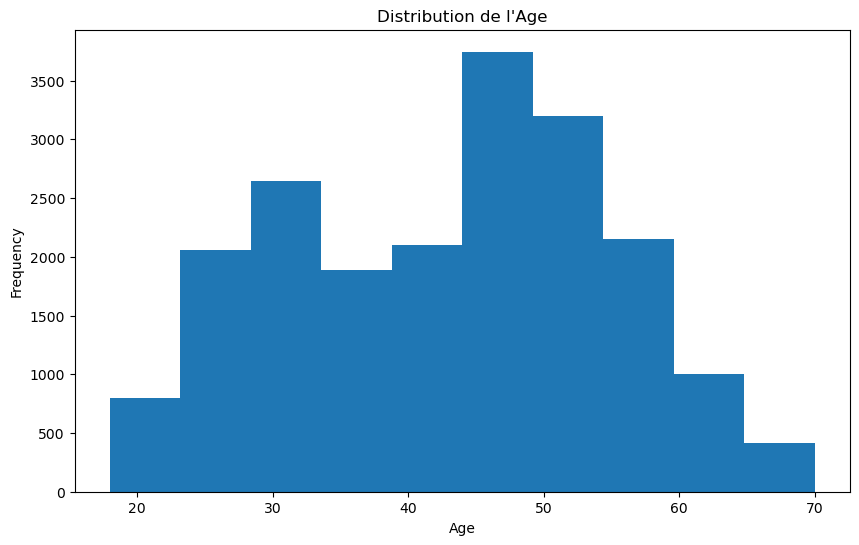

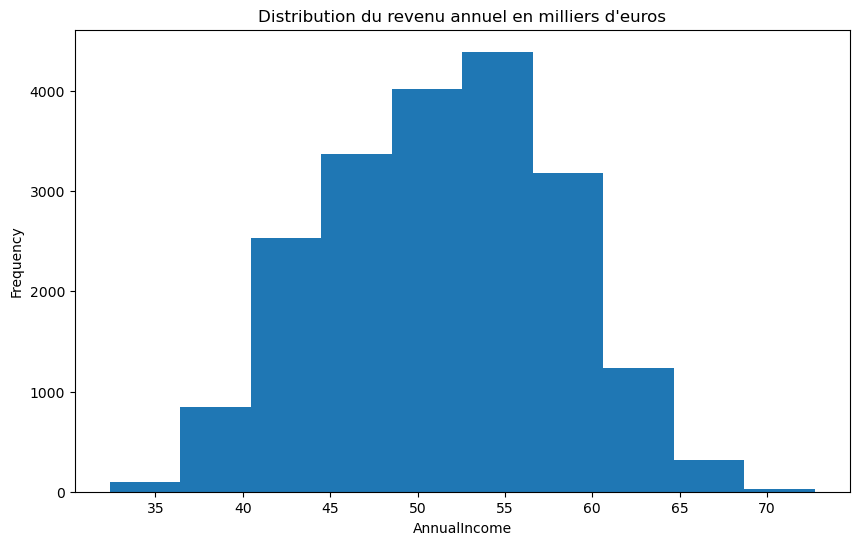

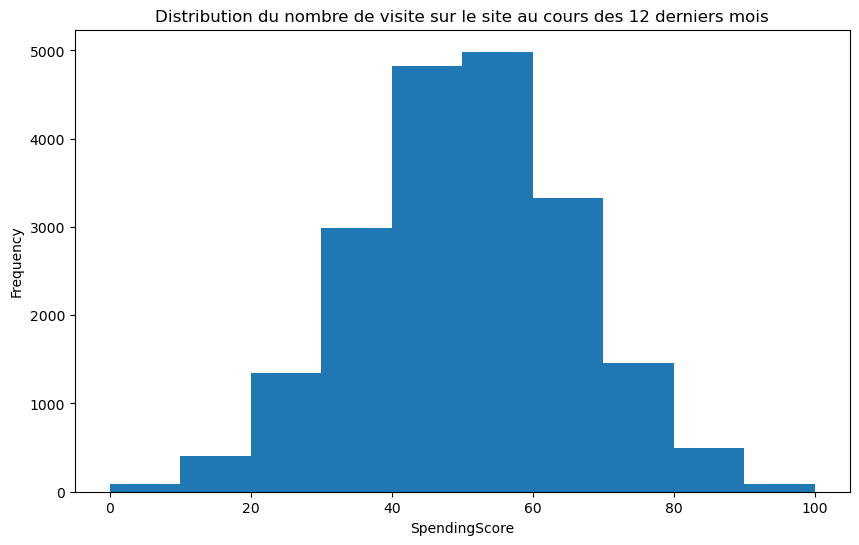

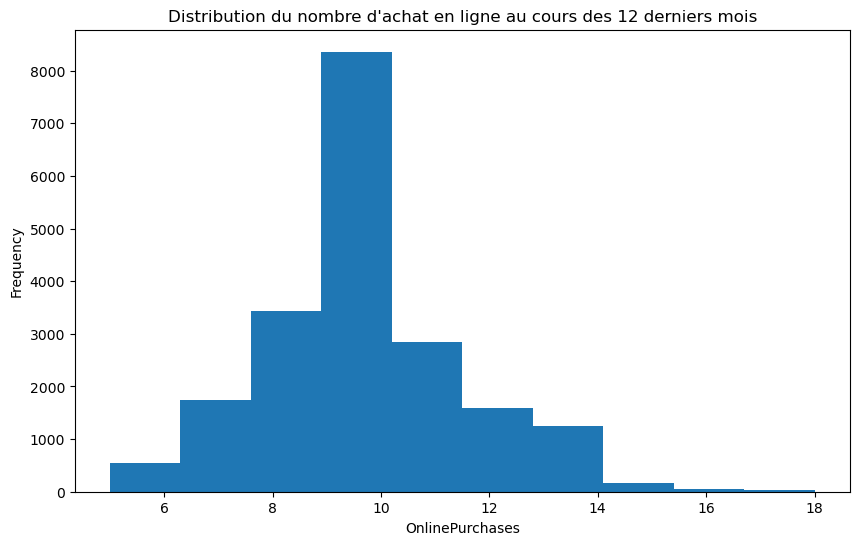

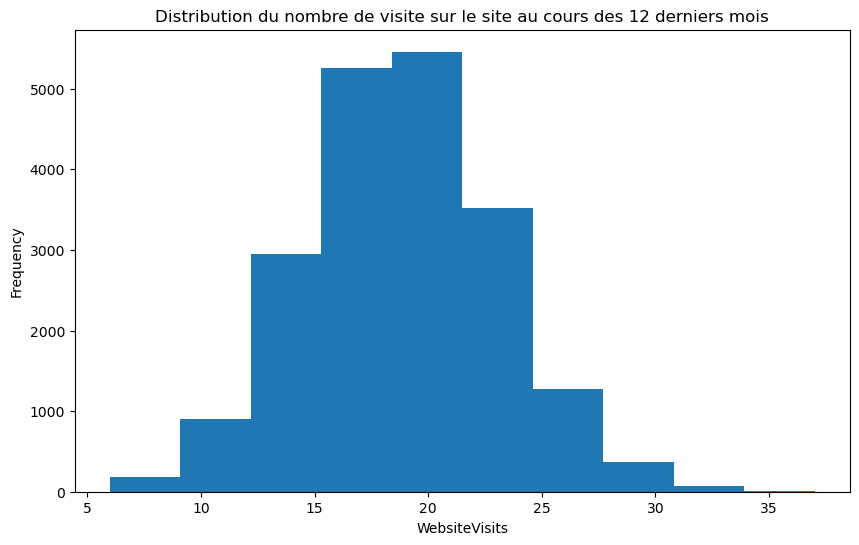

In [185]:
#Histogramme de la distribution de l'Age
plt.figure(figsize=(10,6))
plt.hist(df['Age'])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title ("Distribution de l'Age")
plt.show()  

#Histogramme de la distribution du revenu annuel
plt.figure(figsize=(10,6))
plt.hist(df['AnnualIncome'])
plt.xlabel('AnnualIncome')
plt.ylabel('Frequency')
plt.title ("Distribution du revenu annuel en milliers d'euros")
plt.show()

#Histogramme de la distribution de la propension à dépenser
plt.figure(figsize=(10,6))
plt.hist(df['SpendingScore'])
plt.xlabel('SpendingScore')
plt.ylabel('Frequency')
plt.title ("Distribution du nombre de visite sur le site au cours des 12 derniers mois")
plt.show()

#Histogramme de la distribution du nombre d'achat en ligne au cours des 12 derniers mois
plt.figure(figsize=(10,6))
plt.hist(df['OnlinePurchases'])
plt.xlabel('OnlinePurchases')
plt.ylabel('Frequency')
plt.title ("Distribution du nombre d'achat en ligne au cours des 12 derniers mois")
plt.show()     

#Histogramme de la distribution du nombre de visite sur le site au cours des 12 derniers mois
plt.figure(figsize=(10,6))
plt.hist(df['WebsiteVisits'])
plt.xlabel('WebsiteVisits')
plt.ylabel('Frequency')
plt.title ("Distribution du nombre de visite sur le site au cours des 12 derniers mois")
plt.show()         

****B. Variables qualitatives****

In [23]:
gender_counts = df['Gender'].value_counts()
print(gender_counts)
print("\n")
gender_percents = df['Gender'].value_counts(normalize=True) #Pourcentage de femmes et d'hommes
print(gender_percents)

Gender
Female    10525
Male       9475
Name: count, dtype: int64


Gender
Female    0.52625
Male      0.47375
Name: proportion, dtype: float64


In [25]:
CategoryPreference_counts = df['CategoryPreference'].value_counts()
print(CategoryPreference_counts)
print("\n")
CategoryPreference_percents = df['CategoryPreference'].value_counts(normalize=True) #Pourcentage des préférences des catégories
print(CategoryPreference_percents)

CategoryPreference
Clothing       7822
Electronics    4045
Books          3100
Beauty         3064
Sports         1969
Name: count, dtype: int64


CategoryPreference
Clothing       0.39110
Electronics    0.20225
Books          0.15500
Beauty         0.15320
Sports         0.09845
Name: proportion, dtype: float64


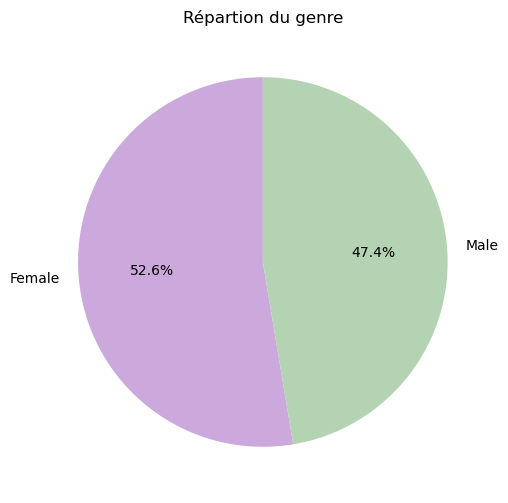

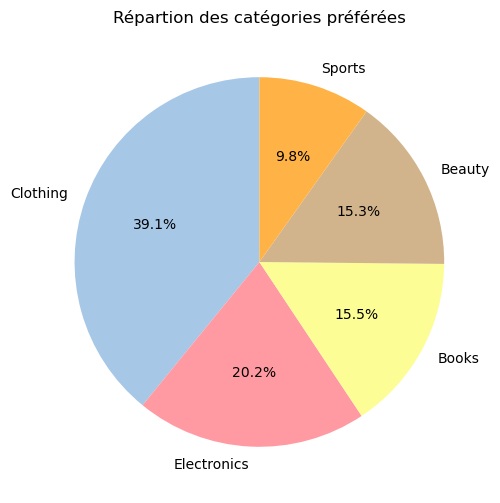

In [189]:
#Diagramme circulaire de la répartition des genres
plt.figure(figsize=(10,6))
gender_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=['#CCA9DD','#B4D3B2'])
plt.title('Répartion du genre')
plt.ylabel('')
plt.show()      

#Diagramme circulaire de la répartition des catégories préférées
plt.figure(figsize=(10,6))
CategoryPreference_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors = ['#A7C7E7', '#FF9AA2', '#FDFD96', '#D2B48C', '#FFB347'])
plt.title('Répartion des catégories préférées')
plt.ylabel('')
plt.show()      

****3. ANALYSE BIVARIÉE****

****A. Relation entre le revenu annuel du client et sa propension à dépenser**** 

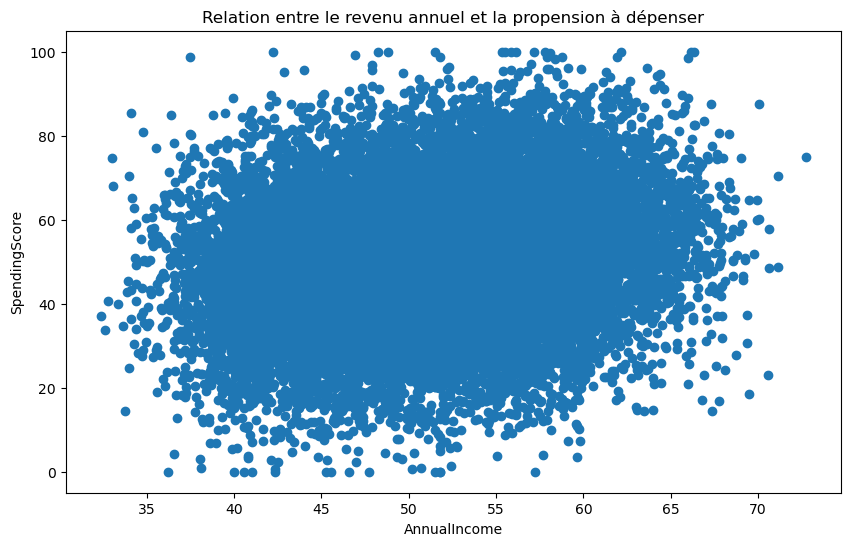

In [191]:
#Corrélation: nuage de point de la relation entre le revenu annuel et la propension à dépenser
plt.figure(figsize=(10,6))
plt.scatter(df['AnnualIncome'], df['SpendingScore'])
plt.xlabel('AnnualIncome')
plt.ylabel('SpendingScore')
plt.title('Relation entre le revenu annuel et la propension à dépenser')
plt.show()

In [193]:
df[["SpendingScore","AnnualIncome"]].corr() #Coefficient de corrélation entre le revenu annuel et la propension à dépenser

,SpendingScore,AnnualIncome
SpendingScore,1.000000,0.184172
AnnualIncome,0.184172,1.000000


****B. Relation entre le nombre de visites du site web et le nombre d'achat en ligne****

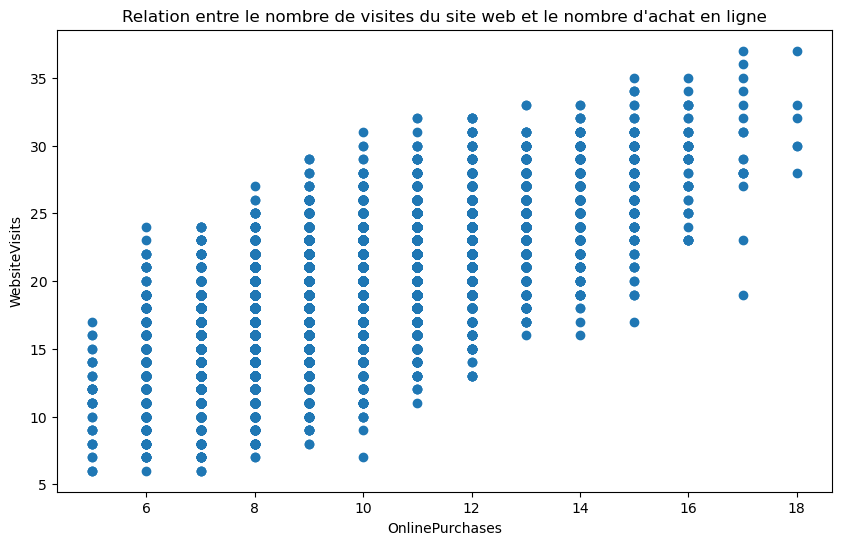

In [195]:
#Corrélation: nuage de point de le nombre de visites du site web et le nombre d'achat en ligne
plt.figure(figsize=(10,6))
plt.scatter(df['OnlinePurchases'], df['WebsiteVisits'])
plt.xlabel('OnlinePurchases')
plt.ylabel('WebsiteVisits')
plt.title("Relation entre le nombre de visites du site web et le nombre d'achat en ligne")
plt.show()

In [35]:
df[["OnlinePurchases","WebsiteVisits"]].corr() #Coefficient de corrélation entre le nombre de visite et le nombre d'achat

,OnlinePurchases,WebsiteVisits
OnlinePurchases,1.000000,0.693272
WebsiteVisits,0.693272,1.000000


****C. Différences d'aptitude à dépenser entre les sexes****

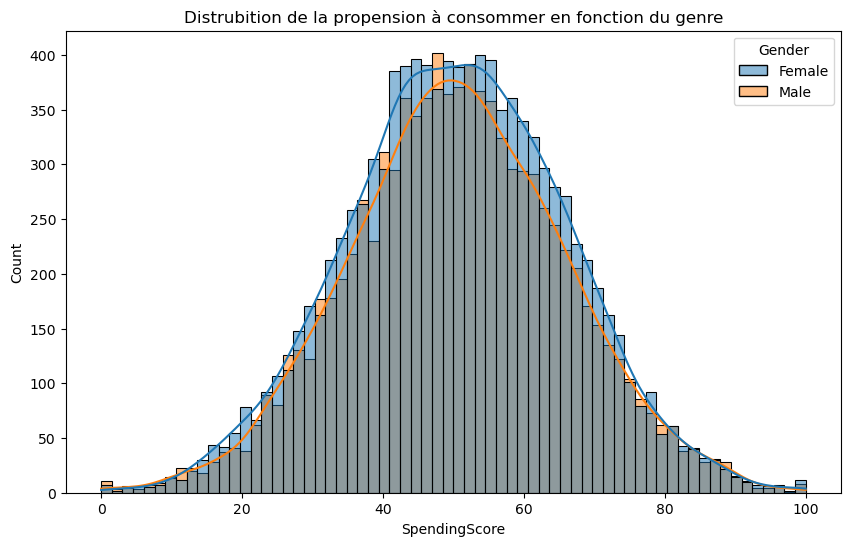

In [37]:
# Histogramme distribution de la propension à consommer en fonction du genre
plt.figure(figsize=(10,6))
sns.histplot(data=df, x="SpendingScore", kde= True, hue="Gender")
plt.title('Distrubition de la propension à consommer en fonction du genre')
plt.show()

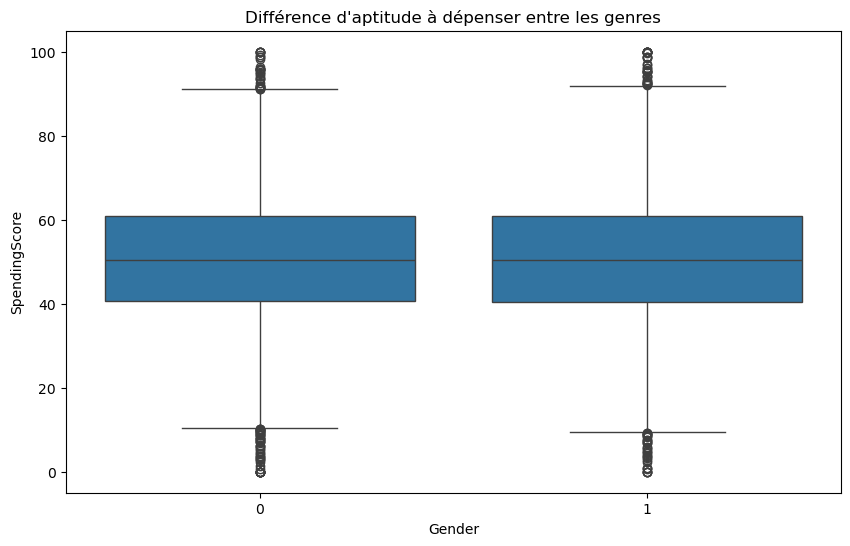

In [197]:
# Boxplot distribution de la propension à consommer en fonction du genre
plt.figure(figsize=(10,6))
sns.boxplot(x=df['Gender'], y=df['SpendingScore'])
plt.xlabel('Gender')
plt.ylabel('SpendingScore')
plt.title("Différence d'aptitude à dépenser entre les genres")
plt.show()

In [43]:
df.groupby("Gender")["SpendingScore"].describe() #Statistiques descriptives de la propension à dépenser en fonction du genre

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,10423.0,50.484079,15.455873,0.0,40.189252,50.474062,61.081677,100.0
Male,9377.0,50.588993,15.425745,0.0,40.435830,50.436653,60.907651,100.0


****4.ANALYSE COMPORTEMENTALE**** 

****A.Caractéristiques des clients visitant très souvent le site web de la boutique****

In [61]:
#Caractéristiques des personnes faisant partie du dernier quartile
top_visiteurs = df[df["WebsiteVisits"] > df["WebsiteVisits"].quantile(0.75)]
print(top_visiteurs.describe().round(2))

       CustomerID      Age  AnnualIncome  SpendingScore  OnlinePurchases  \
count     3771.00  3733.00       3735.00        3738.00          3742.00   
mean     10027.90    46.78         53.86          51.40            11.68   
std       5735.11    11.19          6.37          15.52             1.76   
min          1.00    18.00         34.67           0.00             6.00   
25%       5142.50    39.00         49.98          40.88            10.00   
50%      10052.00    49.00         54.27          51.42            12.00   
75%      14985.00    55.00         58.52          61.79            13.00   
max      19998.00    70.00         71.13         100.00            18.00   

       WebsiteVisits  
count        3771.00  
mean           24.93  
std             2.09  
min            23.00  
25%            23.00  
50%            24.00  
75%            26.00  
max            37.00  


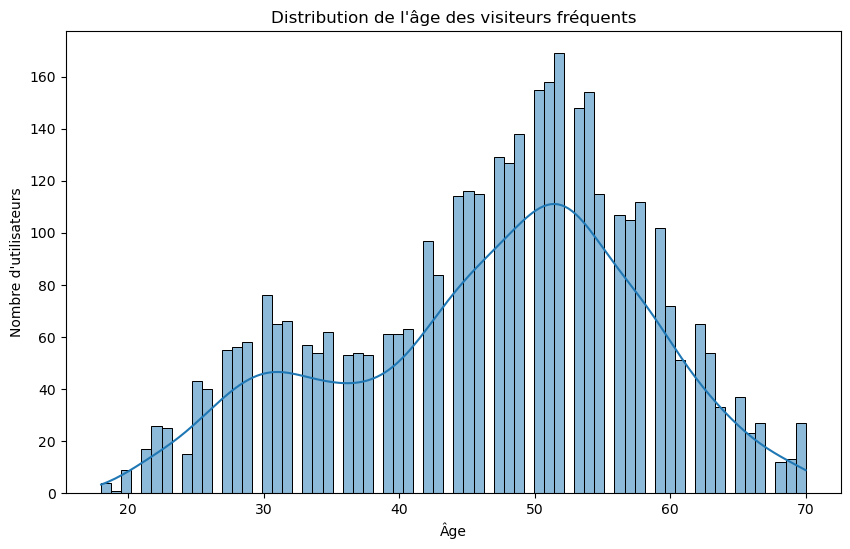

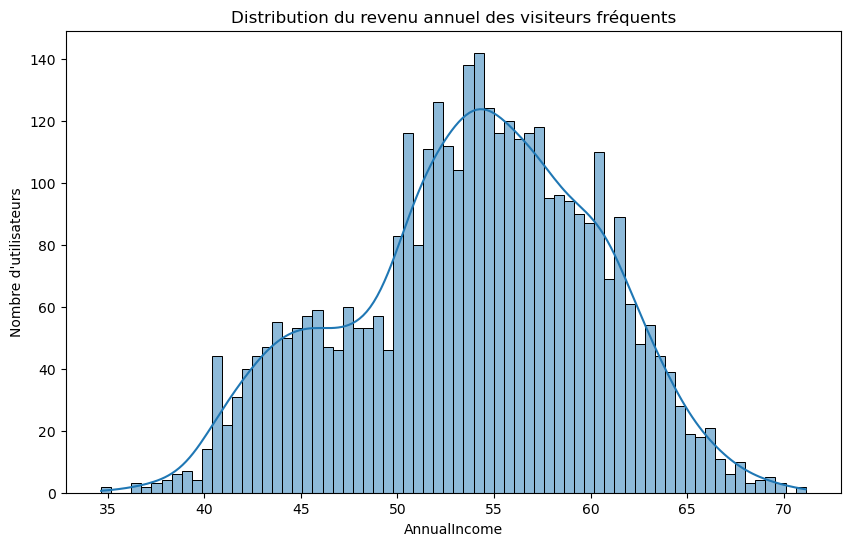

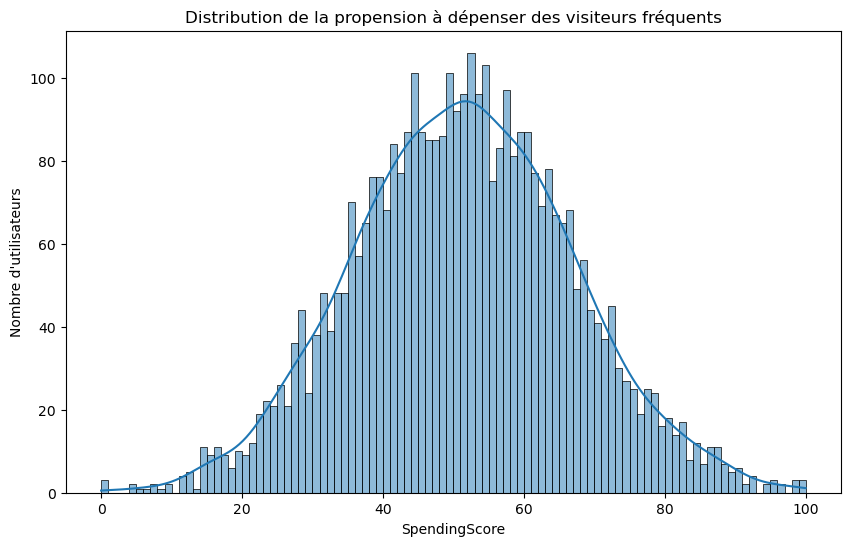

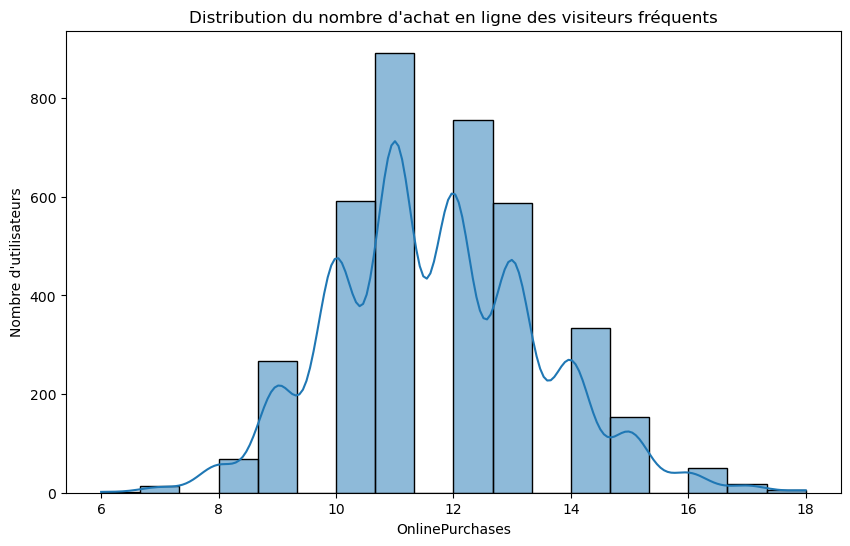

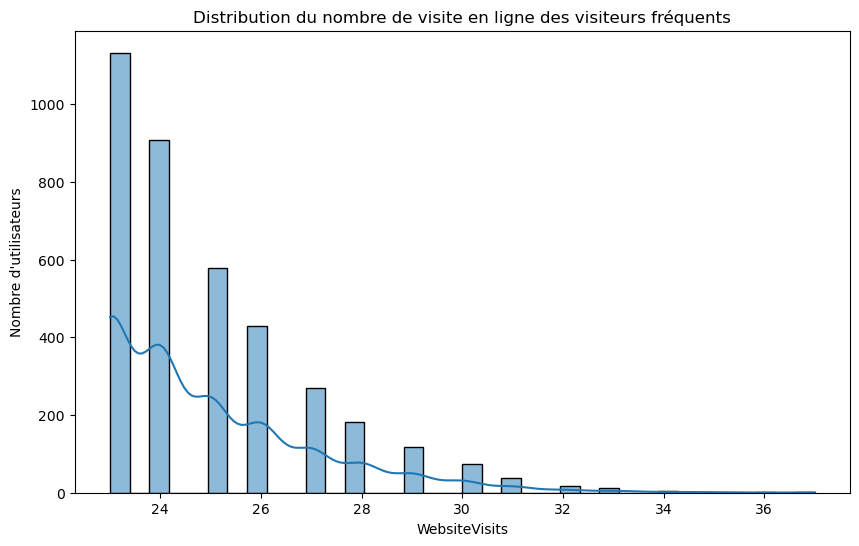

In [63]:
# Histogramme de la distribution de l'âge des visiteurs fréquents
plt.figure(figsize=(10,6))
sns.histplot(data=top_visiteurs, x="Age",bins=70, kde=True)
plt.xlabel("Âge")
plt.ylabel("Nombre d'utilisateurs")
plt.title("Distribution de l'âge des visiteurs fréquents")
plt.show()

# Histogramme de la distribution du revenu annuel des visiteurs fréquents
plt.figure(figsize=(10,6))
sns.histplot(data=top_visiteurs, x="AnnualIncome",bins=70, kde=True)
plt.xlabel("AnnualIncome")
plt.ylabel("Nombre d'utilisateurs")
plt.title("Distribution du revenu annuel des visiteurs fréquents")
plt.show()

# Histogramme de la distribution de la propension à dépenser des visiteurs fréquents
plt.figure(figsize=(10,6))
sns.histplot(data=top_visiteurs, x="SpendingScore",bins=100, kde=True)
plt.xlabel("SpendingScore")
plt.ylabel("Nombre d'utilisateurs")
plt.title("Distribution de la propension à dépenser des visiteurs fréquents")
plt.show()

# Histogramme de la distribution du nombre d'achat en ligne au cours des 12 derniers mois des visiteurs fréquents
plt.figure(figsize=(10,6))
sns.histplot(data=top_visiteurs, x="OnlinePurchases",bins=18, kde=True)
plt.xlabel("OnlinePurchases")
plt.ylabel("Nombre d'utilisateurs")
plt.title("Distribution du nombre d'achat en ligne des visiteurs fréquents")
plt.show()

# Histogramme de la distribution du nombre de visite en ligne au cours des 12 derniers mois des visiteurs fréquents
plt.figure(figsize=(10,6))
sns.histplot(data=top_visiteurs, x="WebsiteVisits",bins=36, kde=True)
plt.xlabel("WebsiteVisits")
plt.ylabel("Nombre d'utilisateurs")
plt.title("Distribution du nombre de visite en ligne des visiteurs fréquents")
plt.show()

****B. Catégories préférées par genre et par âge****

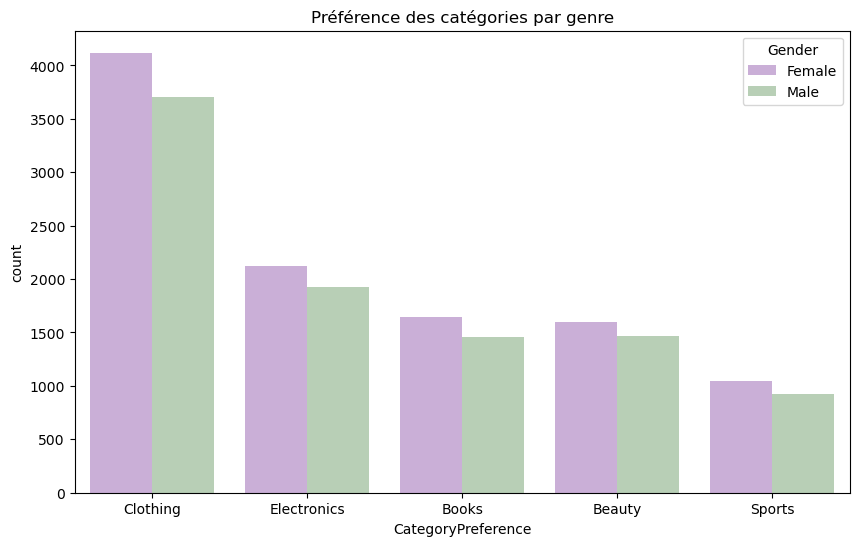

In [65]:
#Histogramme des catégories préférées en fonction du genre
plt.figure(figsize=(10, 6))
palette_colors = ['#CCA9DD', '#B4D3B2']
sns.countplot(data=df, x="CategoryPreference", hue="Gender", palette=palette_colors)
plt.title("Préférence des catégories par genre")
plt.show()

In [67]:
#Remplacer male et female par 1 et 0 dans la variable genre (convertir en numérique)
gender_num = {'Male':0,'Female':1}
df.Gender=[gender_num[item] for item in df.Gender]
df.head()

,CustomerID,Age,Gender,AnnualIncome,SpendingScore,OnlinePurchases,WebsiteVisits,CategoryPreference
0,1,50.0,1,58.973825,39.430462,14.0,26.0,Clothing
1,2,43.0,1,49.754264,47.801850,9.0,17.0,Electronics
2,3,37.0,0,45.072539,25.052909,8.0,7.0,Books
3,4,38.0,1,45.474369,43.367459,13.0,23.0,Clothing
4,5,50.0,1,60.628914,62.271990,14.0,27.0,Electronics


In [69]:
#Statistiques descriptives pour confirmer les tendances de la visualisation
df.groupby("CategoryPreference")["Gender"].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
CategoryPreference,,,,,,,,
Beauty,3064.0,0.52,0.5,0.0,0.0,1.0,1.0,1.0
Books,3100.0,0.53,0.5,0.0,0.0,1.0,1.0,1.0
Clothing,7822.0,0.53,0.5,0.0,0.0,1.0,1.0,1.0
Electronics,4045.0,0.52,0.5,0.0,0.0,1.0,1.0,1.0
Sports,1969.0,0.53,0.5,0.0,0.0,1.0,1.0,1.0


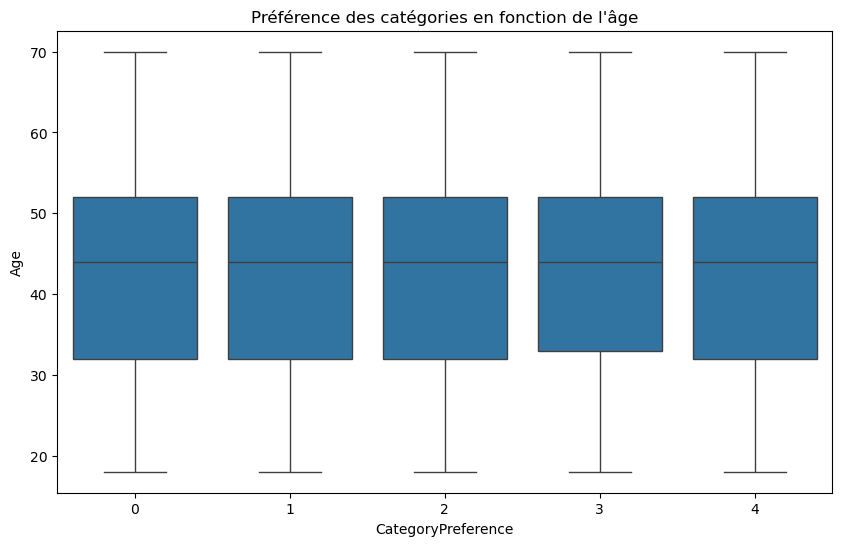

,count,mean,std,min,25%,50%,75%,max
CategoryPreference,,,,,,,,
0,7822.0,42.97,11.75,18.0,32.0,44.0,52.0,70.0
1,4045.0,42.84,11.75,18.0,32.0,44.0,52.0,70.0
2,3100.0,42.95,11.87,18.0,32.0,44.0,52.0,70.0
3,3064.0,43.09,11.84,18.0,33.0,44.0,52.0,70.0
4,1969.0,42.78,11.89,18.0,32.0,44.0,52.0,70.0


In [199]:
# Boxplot des catégories préférées en fonction de l'âge
plt.figure(figsize=(10,6))
sns.boxplot(x=df['CategoryPreference'], y=df['Age'])
plt.xlabel('CategoryPreference')
plt.ylabel('Age')
plt.title("Préférence des catégories en fonction de l'âge")
plt.show()

df.groupby("CategoryPreference")["Age"].describe().round(2)

****C. Catégories de client selon leur aptitude à dépenser****

In [217]:
# Création des catégories de "SpendingScore"
df["SpendingCategory"] = pd.cut(df["SpendingScore"],
                                bins=[0, 33, 66, 100],
                                labels=["Low", "Medium", "High"],
                                include_lowest=True)

df[["SpendingScore", "SpendingCategory"]].head(10)

,SpendingScore,SpendingCategory
0,39.430462,Medium
1,47.801850,Medium
2,25.052909,Low
3,43.367459,Medium
4,62.271990,Medium
5,32.095370,Low
6,31.501483,Low
7,23.668695,Low
8,72.776260,High
9,43.181651,Medium


In [203]:
df.groupby("SpendingCategory",observed=True)["Age"].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
SpendingCategory,,,,,,,,
Low,2534.0,39.77,11.50,18.0,30.0,39.0,49.0,70.0
Medium,14340.0,42.85,11.78,18.0,32.0,44.0,52.0,70.0
High,3126.0,45.94,11.37,18.0,38.0,48.0,54.0,70.0


In [205]:
df.groupby("SpendingCategory",observed=True)["Gender"].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
SpendingCategory,,,,,,,,
Low,2534.0,0.54,0.5,0.0,0.0,1.0,1.0,1.0
Medium,14340.0,0.52,0.5,0.0,0.0,1.0,1.0,1.0
High,3126.0,0.53,0.5,0.0,0.0,1.0,1.0,1.0


In [207]:
df.groupby("SpendingCategory",observed=True)["AnnualIncome"].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
SpendingCategory,,,,,,,,
Low,2534.0,49.46,6.45,33.78,44.46,49.34,54.38,70.57
Medium,14340.0,51.41,6.59,32.40,46.37,51.78,56.27,71.13
High,3126.0,53.37,6.47,33.03,48.80,54.03,58.16,72.72


In [209]:
df.groupby("SpendingCategory",observed=True)["OnlinePurchases"].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
SpendingCategory,,,,,,,,
Low,2534.0,9.43,1.86,5.0,8.0,9.0,11.0,18.0
Medium,14340.0,9.63,1.88,5.0,8.0,9.0,11.0,18.0
High,3126.0,9.83,1.89,5.0,9.0,10.0,11.0,18.0


In [211]:
df.groupby("SpendingCategory",observed=True)["WebsiteVisits"].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
SpendingCategory,,,,,,,,
Low,2534.0,18.69,4.10,6.0,16.0,19.0,21.0,35.0
Medium,14340.0,18.94,4.11,6.0,16.0,19.0,22.0,37.0
High,3126.0,19.19,4.12,7.0,16.0,19.0,22.0,36.0


****5. CLUSTERING DES CLIENTS****

In [227]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [229]:
#Afficher les valeurs manquantes
print(df.isnull().sum())

CustomerID            0
Age                   0
Gender                0
AnnualIncome          0
SpendingScore         0
OnlinePurchases       0
WebsiteVisits         0
CategoryPreference    0
SpendingCategory      0
Cluster               0
dtype: int64


In [231]:
#Remplacer les valeurs manquantes par la médiane pour le clustering 

In [233]:
df["Age"] = df["Age"].fillna(df["Age"].median())
df["AnnualIncome"] = df["AnnualIncome"].fillna(df["AnnualIncome"].median())
df["SpendingScore"] = df["SpendingScore"].fillna(df["SpendingScore"].median())
df["OnlinePurchases"] = df["OnlinePurchases"].fillna(df["OnlinePurchases"].median())
df["WebsiteVisits"] = df["WebsiteVisits"].fillna(df["WebsiteVisits"].median())

****MODÈLE 1****

In [235]:
# Sélection des variables pour le clustering
features = ["OnlinePurchases","AnnualIncome", "SpendingScore", "WebsiteVisits"]
X = df[features]

# Standardisation des données pour éviter les biais liés aux unités différentes
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [237]:
#Vérification qu'il n'y ai plus de valeurs manquantes
print(pd.DataFrame(X_scaled).isnull().sum())

0    0
1    0
2    0
3    0
dtype: int64


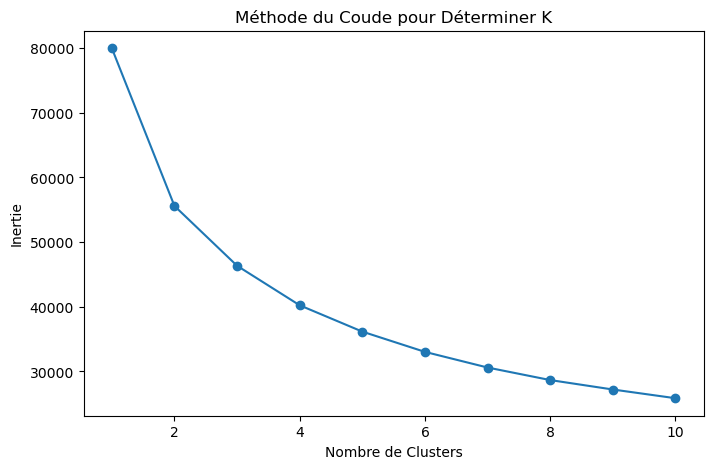

In [239]:
# Exécuter KMeans
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Tracer la méthode du coude
plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, marker='o', linestyle='-')
plt.xlabel("Nombre de Clusters")
plt.ylabel("Inertie")
plt.title("Méthode du Coude pour Déterminer K")
plt.show()

In [241]:
# Appliquer K-Means avec K optimal et assigner les clusters aux clients
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X_scaled)

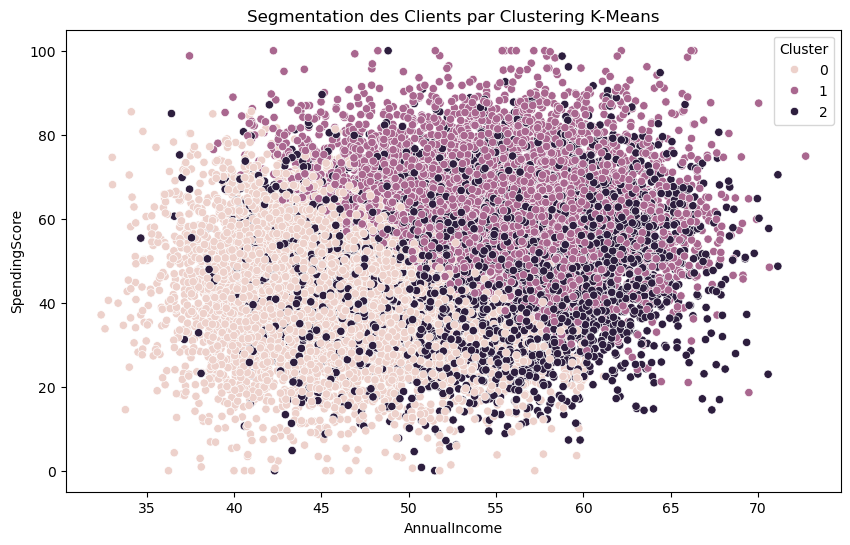

In [243]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="AnnualIncome", y="SpendingScore", hue="Cluster")
plt.xlabel("AnnualIncome")
plt.ylabel("SpendingScore")
plt.title("Segmentation des Clients par Clustering K-Means")
plt.legend(title="Cluster")
plt.show()

In [245]:
df.groupby("Cluster")["Age"].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,7489.0,34.23,9.22,18.0,27.0,32.0,41.0,66.0
1,6510.0,49.03,9.28,18.0,44.0,50.0,55.0,70.0
2,6001.0,47.20,10.55,18.0,41.0,49.0,55.0,70.0


In [247]:
df.groupby("Cluster")["AnnualIncome"].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,7489.0,46.10,4.82,32.40,42.62,45.85,49.31,61.15
1,6510.0,55.20,4.86,37.45,52.03,55.43,58.41,72.72
2,6001.0,54.11,5.85,34.67,50.63,54.25,58.26,71.13


In [249]:
df.groupby("Cluster")["SpendingScore"].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,7489.0,42.68,13.18,0.00,34.00,43.08,51.45,85.53
1,6510.0,61.50,12.25,18.61,52.72,61.06,69.54,100.00
2,6001.0,48.44,13.97,0.00,39.27,48.68,57.78,100.00


In [251]:
df.groupby("Cluster")["OnlinePurchases"].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,7489.0,8.34,1.25,5.0,7.0,8.0,9.0,13.0
1,6510.0,9.27,1.14,6.0,8.0,9.0,10.0,14.0
2,6001.0,11.65,1.45,8.0,11.0,11.0,12.0,18.0


In [253]:
df.groupby("Cluster")["WebsiteVisits"].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,7489.0,16.41,3.19,6.0,14.0,17.0,19.0,26.0
1,6510.0,17.93,2.80,7.0,16.0,18.0,20.0,29.0
2,6001.0,23.19,2.82,16.0,21.0,23.0,25.0,37.0


In [255]:
df.groupby("Cluster")["CategoryPreference"].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,7489.0,1.35,1.37,0.0,0.0,1.0,2.0,4.0
1,6510.0,1.37,1.39,0.0,0.0,1.0,3.0,4.0
2,6001.0,1.38,1.38,0.0,0.0,1.0,3.0,4.0


In [257]:
df.groupby("Cluster")["Gender"].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,7489.0,0.52,0.5,0.0,0.0,1.0,1.0,1.0
1,6510.0,0.53,0.5,0.0,0.0,1.0,1.0,1.0
2,6001.0,0.53,0.5,0.0,0.0,1.0,1.0,1.0


In [259]:
df[["OnlinePurchases","WebsiteVisits"]].corr()

,OnlinePurchases,WebsiteVisits
OnlinePurchases,1.000000,0.686072
WebsiteVisits,0.686072,1.000000


****ÉVALUATION DE LA QUALITÉ DU CLUSTERING DU PREMIER MODÈLE****

****COEFFICIENT DE SILHOUETTE****

In [262]:
#Calcul du coefficient de silhouette pour évaluer à quel point les objets sont bien regroupés dans leur propre cluster et séparés des autres
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Récupérer les labels attribués aux observations
labels = kmeans.labels_

# Calcul du coefficient de silhouette
silhouette_avg = silhouette_score(X_scaled, labels)
print(f"Coefficient de silhouette : {silhouette_avg:.2f}")

Coefficient de silhouette : 0.22


Le coefficient de silhouette est légèrement supérieur à 0, cela indique que les points sont proches de la frontière entre deux clusters donc pas définis de manière optimale.

****DAVIES-BOULDIN INDEX (DBI)****

In [264]:
#Calcul de l'indice Davies-Bouldin mesure le compromis entre la compacité des clusters et leur séparation
from sklearn.metrics import davies_bouldin_score

dbi_score = davies_bouldin_score(X_scaled, labels)
print(f"Davies-Bouldin Index : {dbi_score:.2f}")

Davies-Bouldin Index : 1.42


Le DBI étant entre 1 et 2, mais plus proche de 1, nous permet de dire que les clusters sont relativement bien séparés mais qu'il existe encore une certaine proximité entre eux.

****MODÈLE 2****

In [327]:
# Sélection des variables pour le clustering en ajoutant la variable âge
features2 = ["OnlinePurchases","AnnualIncome", "SpendingScore", "WebsiteVisits","Age"]
X2 = df[features2]

# Standardisation des données pour éviter les biais liés aux unités différentes
scaler = StandardScaler()
X2_scaled = scaler.fit_transform(X2)

In [329]:
#Vérification 1 qu'il n'y ait plus de valeurs manquantes
print(pd.DataFrame(X2_scaled).isnull().sum())

0    0
1    0
2    0
3    0
4    0
dtype: int64


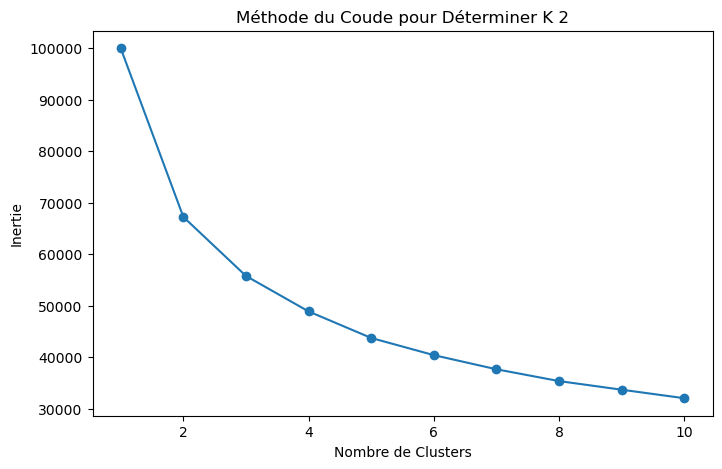

In [331]:
# Exécuter KMeans
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X2_scaled)
    inertia.append(kmeans.inertia_)

# Tracer la méthode du coude
plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, marker='o', linestyle='-')
plt.xlabel("Nombre de Clusters")
plt.ylabel("Inertie")
plt.title("Méthode du Coude pour Déterminer K 2")
plt.show()

In [333]:
# Appliquer K-Means avec K optimal et assigner les clusters aux clients
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df.copy["Cluster"] = kmeans.fit_predict(X2_scaled)

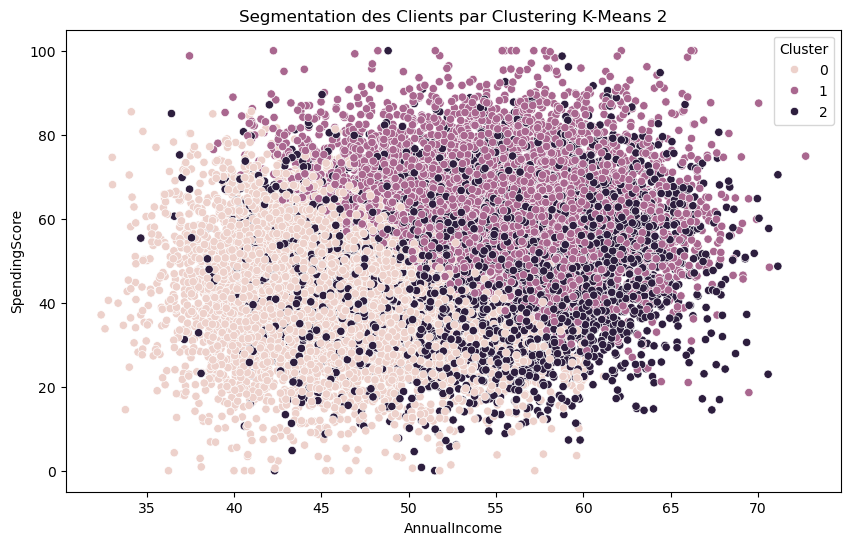

In [335]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="AnnualIncome", y="SpendingScore", hue="Cluster")
plt.xlabel("AnnualIncome")
plt.ylabel("SpendingScore")
plt.title("Segmentation des Clients par Clustering K-Means 2")
plt.legend(title="Cluster")
plt.show()

****ÉVALUATION DE LA QUALITÉ DU CLUSTERING DU SECOND MODÈLE****

In [337]:
#Calcul du coefficient de silhouette pour évaluer à quel point les objets sont bien regroupés dans leur propre cluster et séparés des autres
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Récupérer les labels attribués aux observations
labels = kmeans.labels_

# Calcul du coefficient de silhouette
silhouette_avg = silhouette_score(X2_scaled, labels)
print(f"Coefficient de silhouette : {silhouette_avg:.2f}")

Coefficient de silhouette : 0.24


In [339]:
#Calcul de l'indice Davies-Bouldin mesure le compromis entre la compacité des clusters et leur séparation
from sklearn.metrics import davies_bouldin_score

dbi_score = davies_bouldin_score(X2_scaled, labels)
print(f"Davies-Bouldin Index : {dbi_score:.2f}")

Davies-Bouldin Index : 1.43


****Ce second modèle n'apporte pas de valeur ajoutée, les coefficients sont pratiquement identiques. Les analyses effectuées au préalable ont mis en évidence que les variables liées au genre et aux préférences de catégories ne sont pas suffisamment discriminantes. Par conséquent, nous ne réaliserons pas de tests supplémentaires avec ces variables. Ainsi, bien que le premier modèle puisse être optimisé, nous avons choisi de le conserver et de poursuivre nos analyses à partir de ce dernier parce qu’il présente tout de même des pistes d’explorations..****